In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [70]:
file_paths = [
    r"C:\Users\diman\Downloads\Chess_Elo_Guesser\Data_Transformed2.csv",
    r"C:\Users\diman\Downloads\Chess_Elo_Guesser\Data_Transformed3.csv",
    r"C:\Users\diman\Downloads\Chess_Elo_Guesser\Data_Transformed4.csv",
    r"C:\Users\diman\Downloads\Chess_Elo_Guesser\Data_Transformed5.csv",
    r"C:\Users\diman\Downloads\Chess_Elo_Guesser\Data_Transformed6.csv"
]

data = pd.concat([pd.read_csv(path) for path in file_paths], ignore_index=True)

print(data.head())

   white_rating  black_rating white_result black_result time_control  rated  \
0          1547          1399      timeout          win          300   True   
1          1514          1536          win     resigned          300   True   
2          1544          1452          win   checkmated          300   True   
3           857           821          win      timeout          300   True   
4           829           817          win   checkmated          300   True   

                                                 pgn  \
0  [Event "Live Chess"]\n[Site "Chess.com"]\n[Dat...   
1  [Event "Live Chess"]\n[Site "Chess.com"]\n[Dat...   
2  [Event "Live Chess"]\n[Site "Chess.com"]\n[Dat...   
3  [Event "Live Chess"]\n[Site "Chess.com"]\n[Dat...   
4  [Event "Live Chess"]\n[Site "Chess.com"]\n[Dat...   

                                               Moves  Time_Difference  \
0  e4 e6 d4 d5 e5 c5 c3 Nc6 Ne2 Qb6 Nd2 Nge7 Nf3 ...            602.0   
1           e4 e6 Nf3 d5 Bb5+ c6 Bd3 Nf6 c

In [71]:
pd.set_option('display.max_columns', None)

data.head()

,white_rating,black_rating,white_result,black_result,time_control,rated,pgn,Moves,Time_Difference,blunders_white,mistakes_white,normal_white,blunders_black,mistakes_black,normal_black,gradient,variance,average_eval,average_eval_change_black,average_eval_change_white,game_length,get_opening_name,get_opening_move_number,get_opening_type,castle_moves_black,castle_moves_white,castle_moves_Difference,Piece_moves_individual_10_white_B,Piece_moves_individual_10_white_N,Piece_moves_individual_10_white_R,Piece_moves_individual_10_white_Q,Piece_moves_individual_10_white_K,Piece_moves_individual_10_white_+,Piece_moves_individual_10_black_B,Piece_moves_individual_10_black_N,Piece_moves_individual_10_black_R,Piece_moves_individual_10_black_Q,Piece_moves_individual_10_black_K,Piece_moves_individual_10_black_+,Piece_moves_total_white_B,Piece_moves_total_white_N,Piece_moves_total_white_R,Piece_moves_total_white_Q,Piece_moves_total_white_K,Piece_moves_total_white_+,Piece_moves_total_black_B,Piece_moves_total_black_N,Piece_moves_total_black_R,Piece_moves_total_black_Q,Piece_moves_total_black_K,Piece_moves_total_black_+,aggro_pawn_white_a4,aggro_pawn_white_b4,aggro_pawn_white_g4,aggro_pawn_white_h4,aggro_pawn_white_total_pushes,aggro_pawn_black_a5,aggro_pawn_black_b5,aggro_pawn_black_g5,aggro_pawn_black_h5,aggro_pawn_black_total_pushes,Number_takes_black,Number_takes_white,Number_takes_20_black,Number_takes_20_white,Number_first_piece_take_move_number,Number_second_piece_take_move_number,Number_third_piece_take_move_number,num_legal_average,num_legal_std,Maintained_Bishop_pair_white,Maintained_Bishop_pair_black,Maintained_Knight_pair_white,Maintained_Knight_pair_black,Number_rook_moves_25_white,Number_rook_moves_25_black
0,1547,1399,timeout,win,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 e6 d4 d5 e5 c5 c3 Nc6 Ne2 Qb6 Nd2 Nge7 Nf3 ...,602.0,6,8,15,2,11,17,-0.073309,5.932201,-0.015167,0.297000,-0.352667,60,French Defense: Advance Variation,4,Normal,12.0,NaN,0,3,7,2,1,0,0,3,6,1,2,0,2,3,9,4,4,2,2,4,6,4,4,2,3,0,0,0,0,0,0,0,0,0,0,8,7,4,4,10.0,11.0,12.0,33.666667,10.577665,0,0,1,0,4,1
1,1514,1536,win,resigned,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 e6 Nf3 d5 Bb5+ c6 Bd3 Nf6 c4 dxe4 1-0,47.0,1,1,2,0,1,4,-0.571697,4.983223,-1.146000,0.159000,-0.690000,10,French Defense: Knight Variation,2,Normal,NaN,NaN,0,2,1,0,0,0,1,0,1,0,0,0,0,2,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,NaN,NaN,NaN,27.900000,8.887569,1,1,1,1,0,0
2,1544,1452,win,checkmated,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 e6 d4 d5 e5 c5 c3 Qb6 Ne2 Nc6 Nd2 cxd4 cxd4...,295.0,3,8,19,3,9,18,0.105925,9.691418,3.965902,0.027377,0.095738,61,French Defense: Advance Variation,4,Normal,13.0,NaN,0,4,5,0,4,2,1,4,4,2,2,0,3,5,9,4,4,4,2,5,4,8,2,0,3,1,0,0,0,1,0,0,0,0,0,6,7,5,5,8.0,11.0,11.0,29.524590,12.707749,1,0,0,0,1,5
3,857,821,win,timeout,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 d5 e5 d4 c3 f6 cxd4 Qxd4 Nf3 Qe4+ Be2 fxe5 ...,627.0,22,17,15,20,16,18,0.007790,7.536467,3.996330,0.769450,-0.721101,109,Scandinavian Defense,1,Normal,20.0,8.0,0,4,6,2,1,0,1,2,4,0,6,0,1,16,6,8,8,2,7,2,4,5,17,11,2,0,0,0,0,0,0,0,0,0,0,9,14,4,5,10.0,11.0,17.0,28.697248,9.995837,1,1,0,0,3,2
4,829,817,win,checkmated,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 e5 Bc4 f6 a3 Nc6 Nf3 g5 c3 d6 Ba2 Nh6 d3 g4...,490.0,12,12,10,14,10,10,0.017107,19.508404,1.262174,-1.311304,1.420145,69,Bishop's Opening,2,Normal,15.0,NaN,0,3,4,0,3,1,0,5,4,1,0,0,0,3,8,0,11,3,6,5,7,4,0,8,2,0,0,1,1,2,0,0,0,0,0,6,8,3,3,12.0,13.0,23.0,31.086957,12.788712,1,1,0,0,0,3


In [72]:
data = data.copy()

In [73]:
data.drop(columns=["pgn", "Moves"])

,white_rating,black_rating,white_result,black_result,time_control,rated,Time_Difference,blunders_white,mistakes_white,normal_white,blunders_black,mistakes_black,normal_black,gradient,variance,average_eval,average_eval_change_black,average_eval_change_white,game_length,get_opening_name,get_opening_move_number,get_opening_type,castle_moves_black,castle_moves_white,castle_moves_Difference,Piece_moves_individual_10_white_B,Piece_moves_individual_10_white_N,Piece_moves_individual_10_white_R,Piece_moves_individual_10_white_Q,Piece_moves_individual_10_white_K,Piece_moves_individual_10_white_+,Piece_moves_individual_10_black_B,Piece_moves_individual_10_black_N,Piece_moves_individual_10_black_R,Piece_moves_individual_10_black_Q,Piece_moves_individual_10_black_K,Piece_moves_individual_10_black_+,Piece_moves_total_white_B,Piece_moves_total_white_N,Piece_moves_total_white_R,Piece_moves_total_white_Q,Piece_moves_total_white_K,Piece_moves_total_white_+,Piece_moves_total_black_B,Piece_moves_total_black_N,Piece_moves_total_black_R,Piece_moves_total_black_Q,Piece_moves_total_black_K,Piece_moves_total_black_+,aggro_pawn_white_a4,aggro_pawn_white_b4,aggro_pawn_white_g4,aggro_pawn_white_h4,aggro_pawn_white_total_pushes,aggro_pawn_black_a5,aggro_pawn_black_b5,aggro_pawn_black_g5,aggro_pawn_black_h5,aggro_pawn_black_total_pushes,Number_takes_black,Number_takes_white,Number_takes_20_black,Number_takes_20_white,Number_first_piece_take_move_number,Number_second_piece_take_move_number,Number_third_piece_take_move_number,num_legal_average,num_legal_std,Maintained_Bishop_pair_white,Maintained_Bishop_pair_black,Maintained_Knight_pair_white,Maintained_Knight_pair_black,Number_rook_moves_25_white,Number_rook_moves_25_black
0,1547,1399,timeout,win,300,True,602.0,6,8,15,2,11,17,-0.073309,5.932201,-0.015167,0.297000,-0.352667,60,French Defense: Advance Variation,4,Normal,12.0,NaN,0,3,7,2,1,0,0,3,6,1,2,0,2,3,9,4,4,2,2,4,6,4,4,2,3,0,0,0,0,0,0,0,0,0,0,8,7,4,4,10.0,11.0,12.0,33.666667,10.577665,0,0,1,0,4,1
1,1514,1536,win,resigned,300,True,47.0,1,1,2,0,1,4,-0.571697,4.983223,-1.146000,0.159000,-0.690000,10,French Defense: Knight Variation,2,Normal,NaN,NaN,0,2,1,0,0,0,1,0,1,0,0,0,0,2,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,NaN,NaN,NaN,27.900000,8.887569,1,1,1,1,0,0
2,1544,1452,win,checkmated,300,True,295.0,3,8,19,3,9,18,0.105925,9.691418,3.965902,0.027377,0.095738,61,French Defense: Advance Variation,4,Normal,13.0,NaN,0,4,5,0,4,2,1,4,4,2,2,0,3,5,9,4,4,4,2,5,4,8,2,0,3,1,0,0,0,1,0,0,0,0,0,6,7,5,5,8.0,11.0,11.0,29.524590,12.707749,1,0,0,0,1,5
3,857,821,win,timeout,300,True,627.0,22,17,15,20,16,18,0.007790,7.536467,3.996330,0.769450,-0.721101,109,Scandinavian Defense,1,Normal,20.0,8.0,0,4,6,2,1,0,1,2,4,0,6,0,1,16,6,8,8,2,7,2,4,5,17,11,2,0,0,0,0,0,0,0,0,0,0,9,14,4,5,10.0,11.0,17.0,28.697248,9.995837,1,1,0,0,3,2
4,829,817,win,checkmated,300,True,490.0,12,12,10,14,10,10,0.017107,19.508404,1.262174,-1.311304,1.420145,69,Bishop's Opening,2,Normal,15.0,NaN,0,3,4,0,3,1,0,5,4,1,0,0,0,3,8,0,11,3,6,5,7,4,0,8,2,0,0,1,1,2,0,0,0,0,0,6,8,3,3,12.0,13.0,23.0,31.086957,12.788712,1,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28800,866,901,resigned,win,300,True,143.0,1,2,10,1,5,8,-0.256281,10.898274,-0.534286,0.240357,-0.450000,28,French Defense: Advance Variation,3,Normal,8.0,14.0,1,4,2,0,1,0,1,1,4,0,3,1,0,4,2,0,1,0,1,1,4,0,3,1,0,1,0,0,0,1,1,0,0,0,1,4,1,4,1,11.0,13.0,13.0,32.071429,7.332973,0,1,1,1,0,0
28801,910,912,win,timeout,300,True,562.0,10,17,18,10,18,17,-0.057813,6.537581,-3.918242,0.223626,-0.271648,91,English Opening: The Whale,2,Normal,23.0,NaN,1,3,6,0,4,2,0,3,5,0,9,0,2,3,10,2,15,5,4,3,7,8,14,3,3,0,0,0,0,0,0,0,1,0,1,10,8,4,2,6.0,7.0,14.0,29.923077,9.478901,0,0,1,0,1,1
28802,909,919,abandoned,win,300,True,4

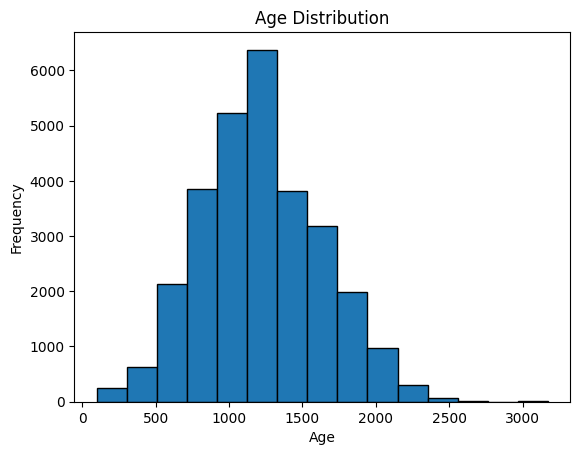

In [74]:
data['white_rating'].plot(kind='hist', bins=15, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

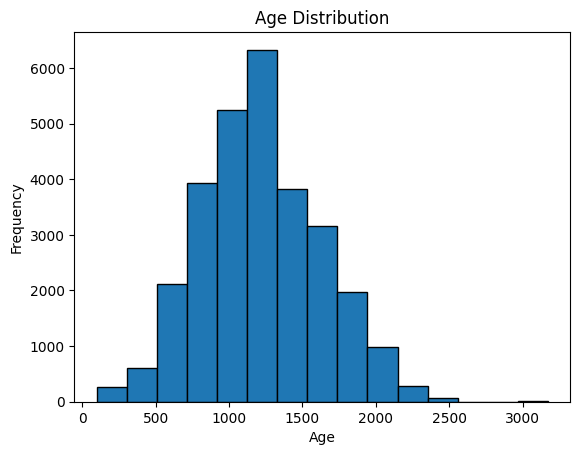

In [75]:
data['black_rating'].plot(kind='hist', bins=15, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [76]:
data = data[data['black_rating'] <= 2800]
data = data[data['white_rating'] <= 2800]


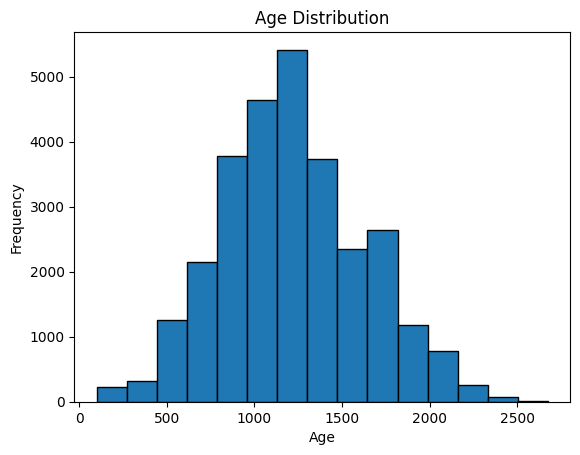

In [77]:
data['black_rating'].plot(kind='hist', bins=15, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [78]:
data['white_result'].value_counts()

white_result
win                   14366
resigned               5975
checkmated             3696
timeout                2843
abandoned               768
repetition              379
stalemate               241
insufficient            192
timevsinsufficient      189
agreed                  134
50move                    5
Name: count, dtype: int64

In [79]:
draw_conditions = ['insufficient', 'repetition', 'timevsinsufficient', 'agreed', '50move', 'stalemate']
loss_conditions = ['timeout', 'resigned', 'checkmated', 'abandoned']

def classify_result(result):
    if result =='win':
        return 1
    elif result in loss_conditions:
        return 0
    elif result in draw_conditions:
        return 0.5
data['white_result_total'] = data['white_result'].apply(classify_result)


In [80]:
data['black_result_total'] = data['black_result'].apply(classify_result)

In [81]:
data.head()

,white_rating,black_rating,white_result,black_result,time_control,rated,pgn,Moves,Time_Difference,blunders_white,mistakes_white,normal_white,blunders_black,mistakes_black,normal_black,gradient,variance,average_eval,average_eval_change_black,average_eval_change_white,game_length,get_opening_name,get_opening_move_number,get_opening_type,castle_moves_black,castle_moves_white,castle_moves_Difference,Piece_moves_individual_10_white_B,Piece_moves_individual_10_white_N,Piece_moves_individual_10_white_R,Piece_moves_individual_10_white_Q,Piece_moves_individual_10_white_K,Piece_moves_individual_10_white_+,Piece_moves_individual_10_black_B,Piece_moves_individual_10_black_N,Piece_moves_individual_10_black_R,Piece_moves_individual_10_black_Q,Piece_moves_individual_10_black_K,Piece_moves_individual_10_black_+,Piece_moves_total_white_B,Piece_moves_total_white_N,Piece_moves_total_white_R,Piece_moves_total_white_Q,Piece_moves_total_white_K,Piece_moves_total_white_+,Piece_moves_total_black_B,Piece_moves_total_black_N,Piece_moves_total_black_R,Piece_moves_total_black_Q,Piece_moves_total_black_K,Piece_moves_total_black_+,aggro_pawn_white_a4,aggro_pawn_white_b4,aggro_pawn_white_g4,aggro_pawn_white_h4,aggro_pawn_white_total_pushes,aggro_pawn_black_a5,aggro_pawn_black_b5,aggro_pawn_black_g5,aggro_pawn_black_h5,aggro_pawn_black_total_pushes,Number_takes_black,Number_takes_white,Number_takes_20_black,Number_takes_20_white,Number_first_piece_take_move_number,Number_second_piece_take_move_number,Number_third_piece_take_move_number,num_legal_average,num_legal_std,Maintained_Bishop_pair_white,Maintained_Bishop_pair_black,Maintained_Knight_pair_white,Maintained_Knight_pair_black,Number_rook_moves_25_white,Number_rook_moves_25_black,white_result_total,black_result_total
0,1547,1399,timeout,win,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 e6 d4 d5 e5 c5 c3 Nc6 Ne2 Qb6 Nd2 Nge7 Nf3 ...,602.0,6,8,15,2,11,17,-0.073309,5.932201,-0.015167,0.297000,-0.352667,60,French Defense: Advance Variation,4,Normal,12.0,NaN,0,3,7,2,1,0,0,3,6,1,2,0,2,3,9,4,4,2,2,4,6,4,4,2,3,0,0,0,0,0,0,0,0,0,0,8,7,4,4,10.0,11.0,12.0,33.666667,10.577665,0,0,1,0,4,1,0.0,1.0
1,1514,1536,win,resigned,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 e6 Nf3 d5 Bb5+ c6 Bd3 Nf6 c4 dxe4 1-0,47.0,1,1,2,0,1,4,-0.571697,4.983223,-1.146000,0.159000,-0.690000,10,French Defense: Knight Variation,2,Normal,NaN,NaN,0,2,1,0,0,0,1,0,1,0,0,0,0,2,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,NaN,NaN,NaN,27.900000,8.887569,1,1,1,1,0,0,1.0,0.0
2,1544,1452,win,checkmated,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 e6 d4 d5 e5 c5 c3 Qb6 Ne2 Nc6 Nd2 cxd4 cxd4...,295.0,3,8,19,3,9,18,0.105925,9.691418,3.965902,0.027377,0.095738,61,French Defense: Advance Variation,4,Normal,13.0,NaN,0,4,5,0,4,2,1,4,4,2,2,0,3,5,9,4,4,4,2,5,4,8,2,0,3,1,0,0,0,1,0,0,0,0,0,6,7,5,5,8.0,11.0,11.0,29.524590,12.707749,1,0,0,0,1,5,1.0,0.0
3,857,821,win,timeout,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 d5 e5 d4 c3 f6 cxd4 Qxd4 Nf3 Qe4+ Be2 fxe5 ...,627.0,22,17,15,20,16,18,0.007790,7.536467,3.996330,0.769450,-0.721101,109,Scandinavian Defense,1,Normal,20.0,8.0,0,4,6,2,1,0,1,2,4,0,6,0,1,16,6,8,8,2,7,2,4,5,17,11,2,0,0,0,0,0,0,0,0,0,0,9,14,4,5,10.0,11.0,17.0,28.697248,9.995837,1,1,0,0,3,2,1.0,0.0
4,829,817,win,checkmated,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 e5 Bc4 f6 a3 Nc6 Nf3 g5 c3 d6 Ba2 Nh6 d3 g4...,490.0,12,12,10,14,10,10,0.017107,19.508404,1.262174,-1.311304,1.420145,69,Bishop's Opening,2,Normal,15.0,NaN,0,3,4,0,3,1,0,5,4,1,0,0,0,3,8,0,11,3,6,5,7,4,0,8,2,0,0,1,1,2,0,0,0,0,0,6,8,3,3,12.0,13.0,23.0,31.086957,12.788712,1,1,0,0,0,3,1.0,0.0


In [82]:
bins = [0, 500, 700, 900, 1100, 1200, 1300, 1500, 1700, 1900, 2200, 2500, 2801]
labels = ['<500', '500–699', '700–899', '900–1099', '1100–1199', '1200–1299', '1300–1499', '1500–1699', '1700–1899', '1900–2199', '2200–2499', '2500–2800']

In [83]:
data['white_elo_bracket'] = pd.cut(data['white_rating'], bins=bins, labels=labels)
data['black_elo_bracket'] = pd.cut(data['black_rating'], bins=bins, labels=labels)


In [84]:
draws_white = data[data['white_result'].isin(draw_conditions)]
draws_black = data[data['black_result'].isin(draw_conditions)]

draw_counts_white = draws_white.groupby(['white_elo_bracket', 'white_result']).size().unstack(fill_value=0)
draw_counts_black = draws_black.groupby(['black_elo_bracket', 'black_result']).size().unstack(fill_value=0)


C:\Users\diman\AppData\Local\Temp\ipykernel_22400\3605530998.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  draw_counts_white = draws_white.groupby(['white_elo_bracket', 'white_result']).size().unstack(fill_value=0)
C:\Users\diman\AppData\Local\Temp\ipykernel_22400\3605530998.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  draw_counts_black = draws_black.groupby(['black_elo_bracket', 'black_result']).size().unstack(fill_value=0)


In [85]:
draw_percentages_white = draw_counts_white.div(draw_counts_white.sum(axis=1), axis=0) * 100
draw_percentages_black = draw_counts_black.div(draw_counts_black.sum(axis=1), axis=0) * 100

total_counts = draw_counts_white + draw_counts_black
total_sums = draw_counts_white.sum(axis=1) + draw_counts_black.sum(axis=1)

draw_percentages_total = total_counts.div(total_sums, axis=0) * 100

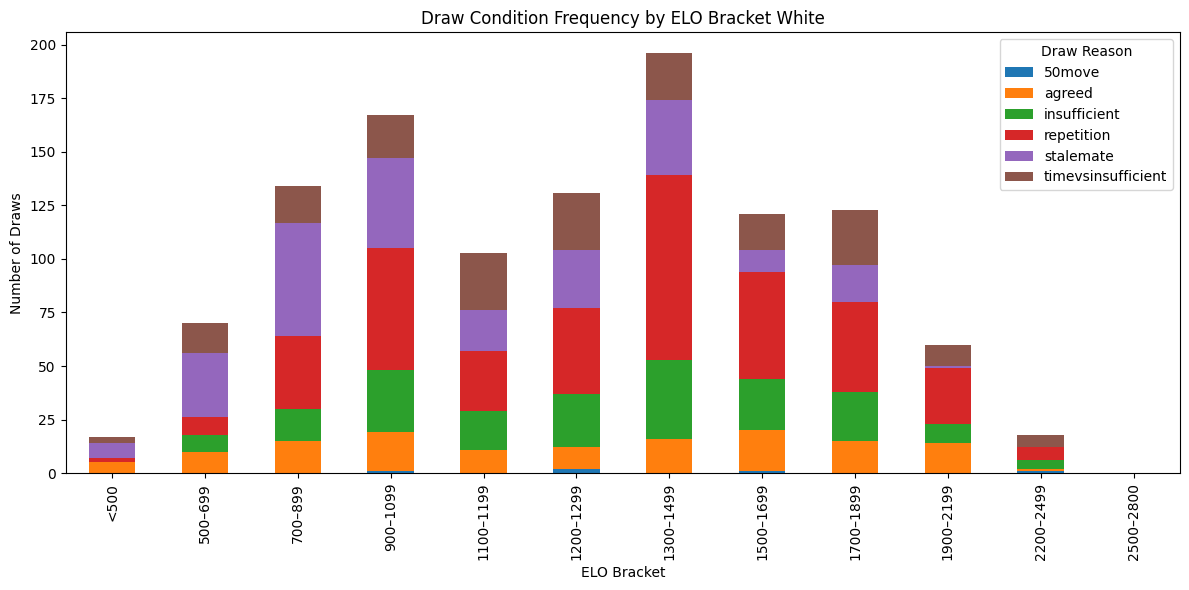

In [86]:
import matplotlib.pyplot as plt

draw_counts_white.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Draw Condition Frequency by ELO Bracket White')
plt.xlabel('ELO Bracket')
plt.ylabel('Number of Draws')
plt.legend(title='Draw Reason')
plt.tight_layout()
plt.show()

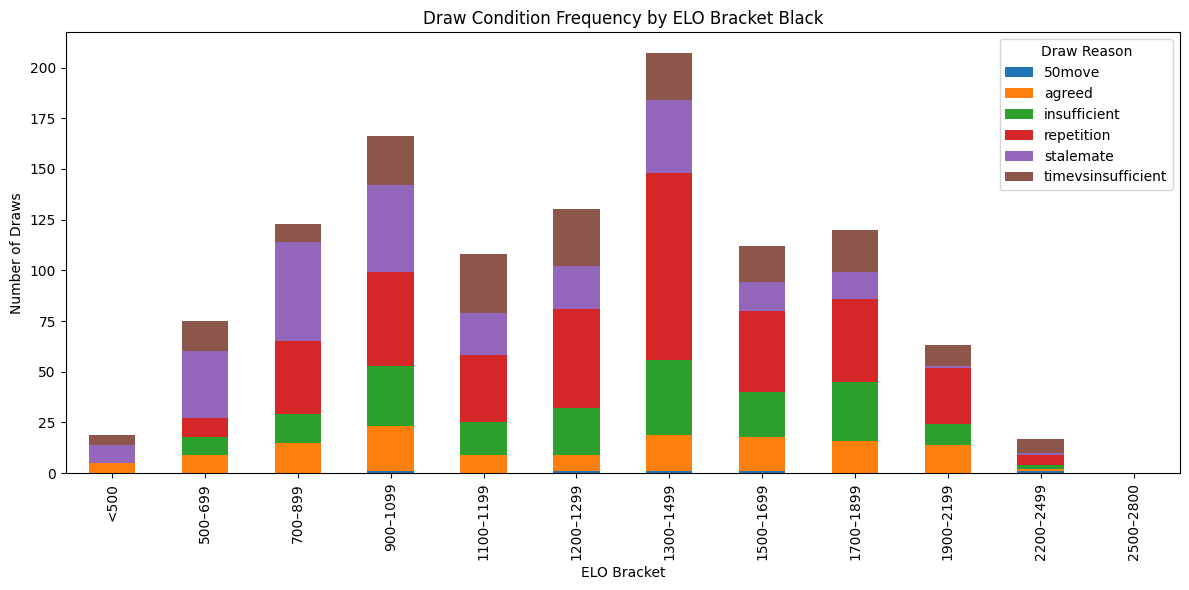

In [87]:
draw_counts_black.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Draw Condition Frequency by ELO Bracket Black')
plt.xlabel('ELO Bracket')
plt.ylabel('Number of Draws')
plt.legend(title='Draw Reason')
plt.tight_layout()
plt.show()

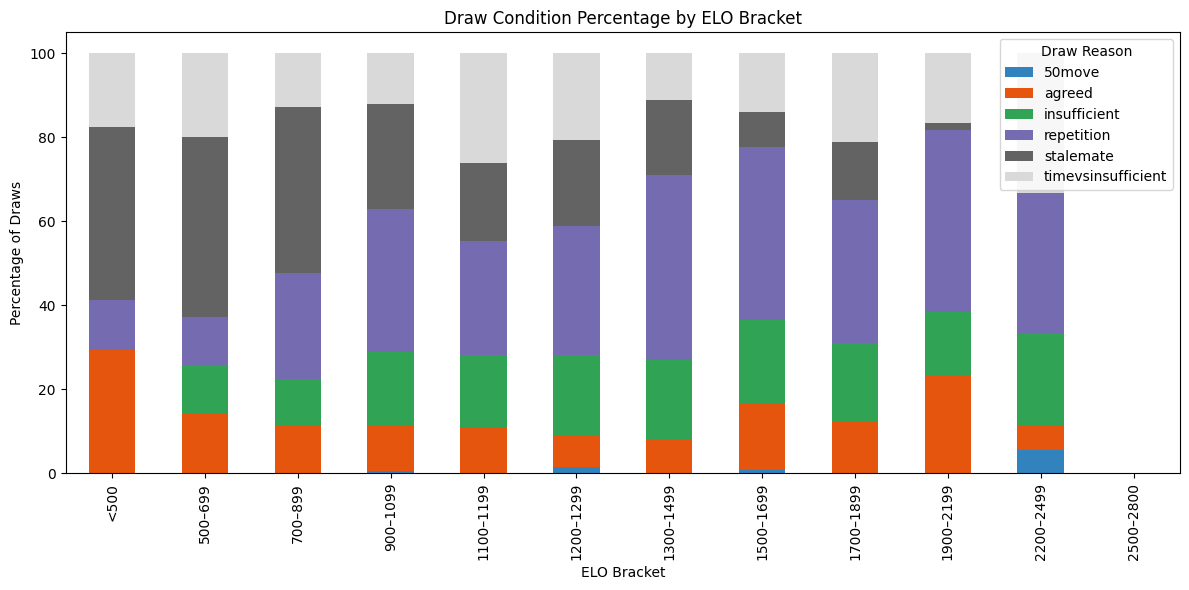

In [88]:
draw_percentages_white.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20c')
plt.title('Draw Condition Percentage by ELO Bracket')
plt.ylabel('Percentage of Draws')
plt.xlabel('ELO Bracket')
plt.legend(title='Draw Reason')
plt.tight_layout()
plt.show()

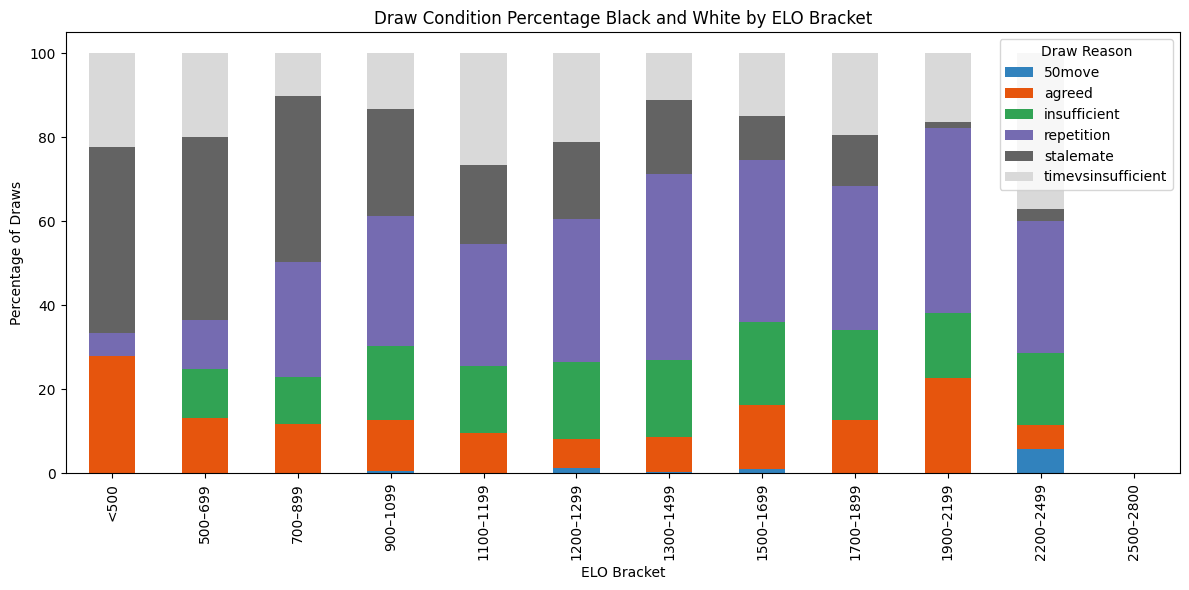

In [89]:
draw_percentages_total.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20c')
plt.title('Draw Condition Percentage Black and White by ELO Bracket')
plt.ylabel('Percentage of Draws')
plt.xlabel('ELO Bracket')
plt.legend(title='Draw Reason')
plt.tight_layout()
plt.show()

In [90]:
loss_white = data[data['white_result'].isin(loss_conditions)]
loss_black = data[data['black_result'].isin(loss_conditions)]

loss_counts_white = loss_white.groupby(['white_elo_bracket', 'white_result']).size().unstack(fill_value=0)
loss_counts_black = loss_black.groupby(['black_elo_bracket', 'black_result']).size().unstack(fill_value=0)

loss_percentages_white = loss_counts_white.div(loss_counts_white.sum(axis=1), axis=0) * 100
loss_percentages_black = loss_counts_black.div(loss_counts_black.sum(axis=1), axis=0) * 100

total_loss_counts = loss_counts_white + loss_counts_black
total_loss_sums = loss_counts_white.sum(axis=1) + loss_counts_black.sum(axis=1)

loss_percentages_total = total_loss_counts.div(total_loss_sums, axis=0) * 100

C:\Users\diman\AppData\Local\Temp\ipykernel_22400\3387623981.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loss_counts_white = loss_white.groupby(['white_elo_bracket', 'white_result']).size().unstack(fill_value=0)
C:\Users\diman\AppData\Local\Temp\ipykernel_22400\3387623981.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loss_counts_black = loss_black.groupby(['black_elo_bracket', 'black_result']).size().unstack(fill_value=0)


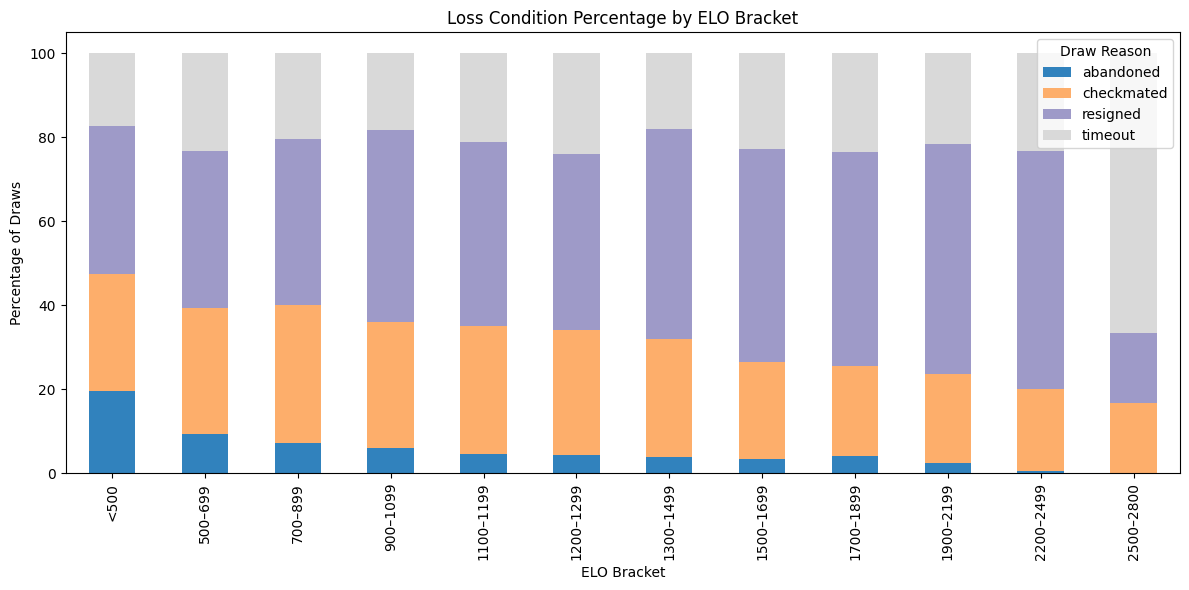

In [91]:
loss_percentages_total.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20c')
plt.title('Loss Condition Percentage by ELO Bracket')
plt.ylabel('Percentage of Draws')
plt.xlabel('ELO Bracket')
plt.legend(title='Draw Reason')
plt.tight_layout()
plt.show()

C:\Users\diman\AppData\Local\Temp\ipykernel_22400\2750917418.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


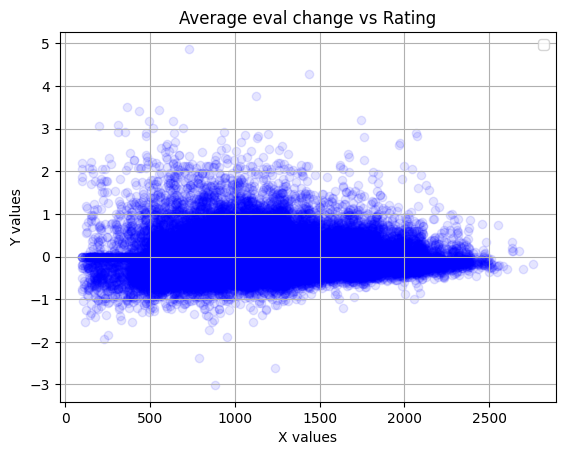

In [92]:
plt.scatter(data['black_rating'], data['average_eval_change_white'], color='blue', alpha=0.1)
plt.scatter(data['white_rating'], -1*data['average_eval_change_black'], color='blue', alpha=0.1)

plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Average eval change vs Rating')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\diman\AppData\Local\Temp\ipykernel_22400\3683133541.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


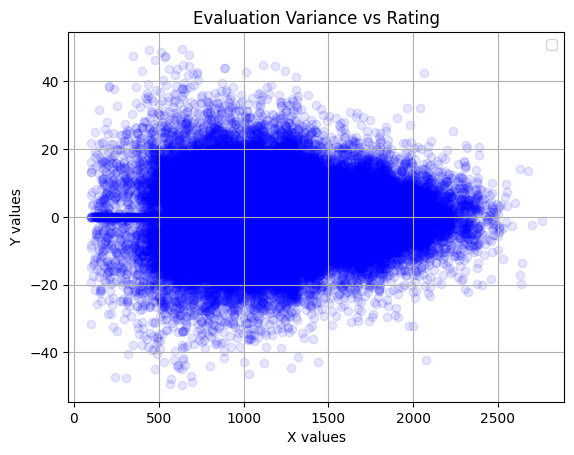

In [93]:
plt.scatter(data['black_rating'], data['variance'], color='blue', alpha=0.1)
plt.scatter(data['white_rating'], -1*data['variance'], color='blue', alpha=0.1)

plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Evaluation Variance vs Rating')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\diman\AppData\Local\Temp\ipykernel_22400\311805861.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


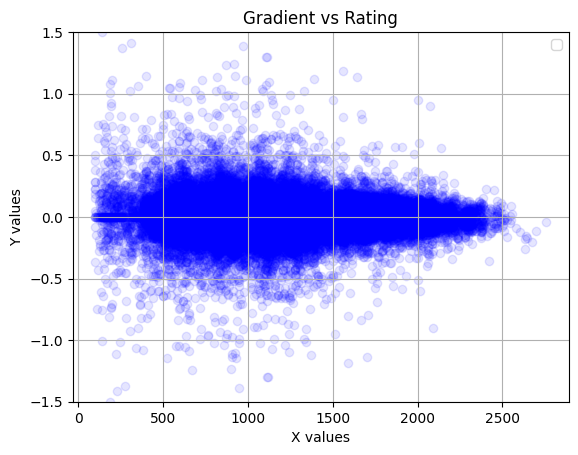

In [94]:
plt.scatter(data['black_rating'], data['gradient'], color='blue', alpha=0.1)
plt.scatter(data['white_rating'], -1*data['gradient'], color='blue', alpha=0.1)

plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Gradient vs Rating')
plt.legend()
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.show()

C:\Users\diman\AppData\Local\Temp\ipykernel_22400\2014745654.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


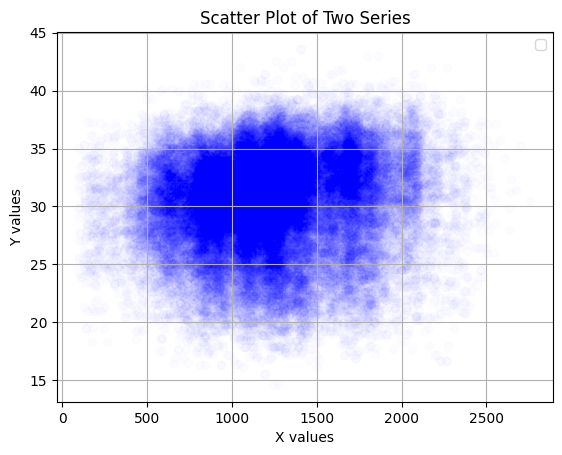

In [95]:
plt.scatter(data['black_rating'], data['num_legal_average'], color='blue', alpha=0.01)
plt.scatter(data['white_rating'], 1*data['num_legal_average'], color='blue', alpha=0.01)

plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Scatter Plot of Two Series')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\diman\AppData\Local\Temp\ipykernel_22400\4140559881.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


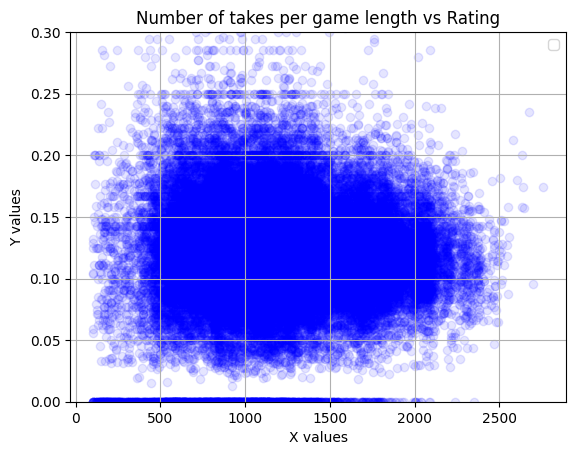

In [96]:
plt.scatter(data['black_rating'], data['Number_takes_black']/data['game_length'], color='blue', alpha=0.1)
plt.scatter(data['white_rating'], 1*data['Number_takes_white']/data['game_length'], color='blue', alpha=0.1)

plt.xlabel('X values')
plt.ylabel('Y values')
plt.ylim(0, 0.3)
plt.title('Number of takes per game length vs Rating')
plt.legend()
plt.grid(True)
plt.show()

In [97]:
grouped_white = data.groupby('white_elo_bracket')[['normal_white', 'mistakes_white', 'blunders_white']].mean()
grouped_black = data.groupby('black_elo_bracket')[['normal_black', 'mistakes_black', 'blunders_black']].mean()

data

C:\Users\diman\AppData\Local\Temp\ipykernel_22400\1663292676.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_white = data.groupby('white_elo_bracket')[['normal_white', 'mistakes_white', 'blunders_white']].mean()
C:\Users\diman\AppData\Local\Temp\ipykernel_22400\1663292676.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_black = data.groupby('black_elo_bracket')[['normal_black', 'mistakes_black', 'blunders_black']].mean()


,white_rating,black_rating,white_result,black_result,time_control,rated,pgn,Moves,Time_Difference,blunders_white,mistakes_white,normal_white,blunders_black,mistakes_black,normal_black,gradient,variance,average_eval,average_eval_change_black,average_eval_change_white,game_length,get_opening_name,get_opening_move_number,get_opening_type,castle_moves_black,castle_moves_white,castle_moves_Difference,Piece_moves_individual_10_white_B,Piece_moves_individual_10_white_N,Piece_moves_individual_10_white_R,Piece_moves_individual_10_white_Q,Piece_moves_individual_10_white_K,Piece_moves_individual_10_white_+,Piece_moves_individual_10_black_B,Piece_moves_individual_10_black_N,Piece_moves_individual_10_black_R,Piece_moves_individual_10_black_Q,Piece_moves_individual_10_black_K,Piece_moves_individual_10_black_+,Piece_moves_total_white_B,Piece_moves_total_white_N,Piece_moves_total_white_R,Piece_moves_total_white_Q,Piece_moves_total_white_K,Piece_moves_total_white_+,Piece_moves_total_black_B,Piece_moves_total_black_N,Piece_moves_total_black_R,Piece_moves_total_black_Q,Piece_moves_total_black_K,Piece_moves_total_black_+,aggro_pawn_white_a4,aggro_pawn_white_b4,aggro_pawn_white_g4,aggro_pawn_white_h4,aggro_pawn_white_total_pushes,aggro_pawn_black_a5,aggro_pawn_black_b5,aggro_pawn_black_g5,aggro_pawn_black_h5,aggro_pawn_black_total_pushes,Number_takes_black,Number_takes_white,Number_takes_20_black,Number_takes_20_white,Number_first_piece_take_move_number,Number_second_piece_take_move_number,Number_third_piece_take_move_number,num_legal_average,num_legal_std,Maintained_Bishop_pair_white,Maintained_Bishop_pair_black,Maintained_Knight_pair_white,Maintained_Knight_pair_black,Number_rook_moves_25_white,Number_rook_moves_25_black,white_result_total,black_result_total,white_elo_bracket,black_elo_bracket
0,1547,1399,timeout,win,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 e6 d4 d5 e5 c5 c3 Nc6 Ne2 Qb6 Nd2 Nge7 Nf3 ...,602.0,6,8,15,2,11,17,-0.073309,5.932201,-0.015167,0.297000,-0.352667,60,French Defense: Advance Variation,4,Normal,12.0,NaN,0,3,7,2,1,0,0,3,6,1,2,0,2,3,9,4,4,2,2,4,6,4,4,2,3,0,0,0,0,0,0,0,0,0,0,8,7,4,4,10.0,11.0,12.0,33.666667,10.577665,0,0,1,0,4,1,0.0,1.0,1500–1699,1300–1499
1,1514,1536,win,resigned,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 e6 Nf3 d5 Bb5+ c6 Bd3 Nf6 c4 dxe4 1-0,47.0,1,1,2,0,1,4,-0.571697,4.983223,-1.146000,0.159000,-0.690000,10,French Defense: Knight Variation,2,Normal,NaN,NaN,0,2,1,0,0,0,1,0,1,0,0,0,0,2,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,NaN,NaN,NaN,27.900000,8.887569,1,1,1,1,0,0,1.0,0.0,1500–1699,1500–1699
2,1544,1452,win,checkmated,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 e6 d4 d5 e5 c5 c3 Qb6 Ne2 Nc6 Nd2 cxd4 cxd4...,295.0,3,8,19,3,9,18,0.105925,9.691418,3.965902,0.027377,0.095738,61,French Defense: Advance Variation,4,Normal,13.0,NaN,0,4,5,0,4,2,1,4,4,2,2,0,3,5,9,4,4,4,2,5,4,8,2,0,3,1,0,0,0,1,0,0,0,0,0,6,7,5,5,8.0,11.0,11.0,29.524590,12.707749,1,0,0,0,1,5,1.0,0.0,1500–1699,1300–1499
3,857,821,win,timeout,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 d5 e5 d4 c3 f6 cxd4 Qxd4 Nf3 Qe4+ Be2 fxe5 ...,627.0,22,17,15,20,16,18,0.007790,7.536467,3.996330,0.769450,-0.721101,109,Scandinavian Defense,1,Normal,20.0,8.0,0,4,6,2,1,0,1,2,4,0,6,0,1,16,6,8,8,2,7,2,4,5,17,11,2,0,0,0,0,0,0,0,0,0,0,9,14,4,5,10.0,11.0,17.0,28.697248,9.995837,1,1,0,0,3,2,1.0,0.0,700–899,700–899
4,829,817,win,checkmated,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 e5 Bc4 f6 a3 Nc6 Nf3 g5 c3 d6 Ba2 Nh6 d3 g4...,490.0,12,12,10,14,10,10,0.017107,19.508404,1.262174,-1.311304,1.420145,69,Bishop's Opening,2,Normal,15.0,NaN,0,3,4,0,3,1,0,5,4,1,0,0,0,3,8,0,11,3,6,5,7,4,0,8,2,0,0,1,1,2,0,0,0,0,0,6,8,3,3,12.0,13.0,23.0,31.086957,12.788712,1,1,0,0,0,3,1.0,0.0,700–899,700–899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [98]:
data["Average_rating"] = (data["black_rating"]+data["white_rating"])/2

In [99]:
data["total_blunders"] = data["blunders_black"]+data["blunders_white"]
data["total_mistakes"] = data["mistakes_black"]+data["mistakes_white"]
data["total_normal"] = data["normal_black"]+data["normal_white"]


In [100]:
grouped_total = data.groupby('white_elo_bracket')[['total_normal', 'total_mistakes', 'total_blunders']].mean()
row_totals = grouped_total.sum(axis=1)
grouped_percentage = grouped_total.div(row_totals, axis=0) * 100

C:\Users\diman\AppData\Local\Temp\ipykernel_22400\1625222089.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_total = data.groupby('white_elo_bracket')[['total_normal', 'total_mistakes', 'total_blunders']].mean()


In [101]:
moves_percentages_total = grouped_total.div(total_loss_sums, axis=0) * 100

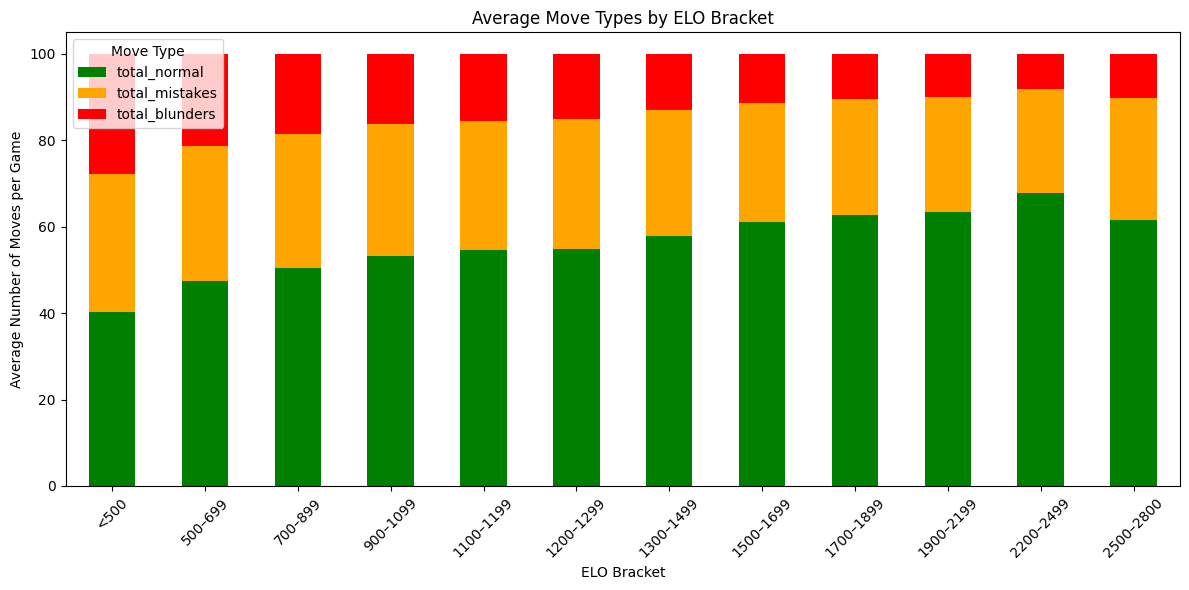

In [102]:

grouped_percentage.plot(kind='bar', stacked=True, figsize=(12, 6), color=['green', 'orange', 'red'])

plt.title('Average Move Types by ELO Bracket')
plt.xlabel('ELO Bracket')
plt.ylabel('Average Number of Moves per Game')
plt.legend(title='Move Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [103]:
data.head()

,white_rating,black_rating,white_result,black_result,time_control,rated,pgn,Moves,Time_Difference,blunders_white,mistakes_white,normal_white,blunders_black,mistakes_black,normal_black,gradient,variance,average_eval,average_eval_change_black,average_eval_change_white,game_length,get_opening_name,get_opening_move_number,get_opening_type,castle_moves_black,castle_moves_white,castle_moves_Difference,Piece_moves_individual_10_white_B,Piece_moves_individual_10_white_N,Piece_moves_individual_10_white_R,Piece_moves_individual_10_white_Q,Piece_moves_individual_10_white_K,Piece_moves_individual_10_white_+,Piece_moves_individual_10_black_B,Piece_moves_individual_10_black_N,Piece_moves_individual_10_black_R,Piece_moves_individual_10_black_Q,Piece_moves_individual_10_black_K,Piece_moves_individual_10_black_+,Piece_moves_total_white_B,Piece_moves_total_white_N,Piece_moves_total_white_R,Piece_moves_total_white_Q,Piece_moves_total_white_K,Piece_moves_total_white_+,Piece_moves_total_black_B,Piece_moves_total_black_N,Piece_moves_total_black_R,Piece_moves_total_black_Q,Piece_moves_total_black_K,Piece_moves_total_black_+,aggro_pawn_white_a4,aggro_pawn_white_b4,aggro_pawn_white_g4,aggro_pawn_white_h4,aggro_pawn_white_total_pushes,aggro_pawn_black_a5,aggro_pawn_black_b5,aggro_pawn_black_g5,aggro_pawn_black_h5,aggro_pawn_black_total_pushes,Number_takes_black,Number_takes_white,Number_takes_20_black,Number_takes_20_white,Number_first_piece_take_move_number,Number_second_piece_take_move_number,Number_third_piece_take_move_number,num_legal_average,num_legal_std,Maintained_Bishop_pair_white,Maintained_Bishop_pair_black,Maintained_Knight_pair_white,Maintained_Knight_pair_black,Number_rook_moves_25_white,Number_rook_moves_25_black,white_result_total,black_result_total,white_elo_bracket,black_elo_bracket,Average_rating,total_blunders,total_mistakes,total_normal
0,1547,1399,timeout,win,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 e6 d4 d5 e5 c5 c3 Nc6 Ne2 Qb6 Nd2 Nge7 Nf3 ...,602.0,6,8,15,2,11,17,-0.073309,5.932201,-0.015167,0.297000,-0.352667,60,French Defense: Advance Variation,4,Normal,12.0,NaN,0,3,7,2,1,0,0,3,6,1,2,0,2,3,9,4,4,2,2,4,6,4,4,2,3,0,0,0,0,0,0,0,0,0,0,8,7,4,4,10.0,11.0,12.0,33.666667,10.577665,0,0,1,0,4,1,0.0,1.0,1500–1699,1300–1499,1473.0,8,19,32
1,1514,1536,win,resigned,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 e6 Nf3 d5 Bb5+ c6 Bd3 Nf6 c4 dxe4 1-0,47.0,1,1,2,0,1,4,-0.571697,4.983223,-1.146000,0.159000,-0.690000,10,French Defense: Knight Variation,2,Normal,NaN,NaN,0,2,1,0,0,0,1,0,1,0,0,0,0,2,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,NaN,NaN,NaN,27.900000,8.887569,1,1,1,1,0,0,1.0,0.0,1500–1699,1500–1699,1525.0,1,2,6
2,1544,1452,win,checkmated,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 e6 d4 d5 e5 c5 c3 Qb6 Ne2 Nc6 Nd2 cxd4 cxd4...,295.0,3,8,19,3,9,18,0.105925,9.691418,3.965902,0.027377,0.095738,61,French Defense: Advance Variation,4,Normal,13.0,NaN,0,4,5,0,4,2,1,4,4,2,2,0,3,5,9,4,4,4,2,5,4,8,2,0,3,1,0,0,0,1,0,0,0,0,0,6,7,5,5,8.0,11.0,11.0,29.524590,12.707749,1,0,0,0,1,5,1.0,0.0,1500–1699,1300–1499,1498.0,6,17,37
3,857,821,win,timeout,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 d5 e5 d4 c3 f6 cxd4 Qxd4 Nf3 Qe4+ Be2 fxe5 ...,627.0,22,17,15,20,16,18,0.007790,7.536467,3.996330,0.769450,-0.721101,109,Scandinavian Defense,1,Normal,20.0,8.0,0,4,6,2,1,0,1,2,4,0,6,0,1,16,6,8,8,2,7,2,4,5,17,11,2,0,0,0,0,0,0,0,0,0,0,9,14,4,5,10.0,11.0,17.0,28.697248,9.995837,1,1,0,0,3,2,1.0,0.0,700–899,700–899,839.0,42,33,33
4,829,817,win,checkmated,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 e5 Bc4 f6 a3 Nc6 Nf3 g5 c3 d6 Ba2 Nh6 d3 g4...,490.0,12,12,10,14,10,10,0.017107,19.508404,1.262174,-1.311304,1.420145,69,Bishop's Opening,2,Normal,15.0,NaN,0,3,4,0,3,1,0,5,4,1,0,0,0,3,8,0,11,3,6,5,7,4,0,8,2,0,0,1,1,2,0,0,0,0,0,6,8,3,3,12.0,13.0,23.0,31.086957,12.788712,1,1,0,0,0,3,1.0,0.0,700–899,700–899,823.0,26,22,20


In [104]:
data["average_eval_change_black"]

0        0.297000
1        0.159000
2        0.027377
3        0.769450
4       -1.311304
           ...   
28800    0.240357
28801    0.223626
28802    0.437222
28803    0.746842
28804    0.242039
Name: average_eval_change_black, Length: 28788, dtype: float64

In [105]:
data_edit = data

In [106]:
data_edit = data_edit.drop(columns=["pgn", "Moves", "white_elo_bracket", "black_elo_bracket", "Average_rating"])

In [107]:

data_edit.columns

Index(['white_rating', 'black_rating', 'white_result', 'black_result',
       'time_control', 'rated', 'Time_Difference', 'blunders_white',
       'mistakes_white', 'normal_white', 'blunders_black', 'mistakes_black',
       'normal_black', 'gradient', 'variance', 'average_eval',
       'average_eval_change_black', 'average_eval_change_white', 'game_length',
       'get_opening_name', 'get_opening_move_number', 'get_opening_type',
       'castle_moves_black', 'castle_moves_white', 'castle_moves_Difference',
       'Piece_moves_individual_10_white_B',
       'Piece_moves_individual_10_white_N',
       'Piece_moves_individual_10_white_R',
       'Piece_moves_individual_10_white_Q',
       'Piece_moves_individual_10_white_K',
       'Piece_moves_individual_10_white_+',
       'Piece_moves_individual_10_black_B',
       'Piece_moves_individual_10_black_N',
       'Piece_moves_individual_10_black_R',
       'Piece_moves_individual_10_black_Q',
       'Piece_moves_individual_10_black_K',
    

In [108]:
player_eval_array = data_edit["gradient"]
gradient_black = [-x for x in player_eval_array]

In [109]:
player_eval_change = data_edit["average_eval_change_black"]
black_eval_change = [-x for x in player_eval_array]

In [110]:
def transform_data(dataframe):
    data_black = pd.DataFrame({
        "player_color": 1,
        "player_elo": dataframe["black_rating"],
        "opponent_elo": dataframe["white_rating"],
        "result": dataframe["black_result_total"],
        "time_control": dataframe["time_control"],
        "rated": dataframe["rated"],
        "time_difference": dataframe["Time_Difference"],
        "blunders": dataframe["blunders_black"],
        "mistakes": dataframe["mistakes_black"],
        "normal": dataframe["normal_black"],
        "gradient": dataframe["gradient"],
        "variance": dataframe["variance"],
        "average_eval": dataframe["average_eval"],
        "average_eval_change": dataframe["average_eval_change_black"],
        "game_length": dataframe["game_length"],
        "opening_name": dataframe["get_opening_name"],
        "opening_move_number": dataframe["get_opening_move_number"],
        "opening_type": dataframe["get_opening_type"],
        "castle_moves": dataframe["castle_moves_black"],
        "castle_moves_diff": dataframe["castle_moves_Difference"],
        "piece_moves_ind_B": dataframe["Piece_moves_individual_10_black_B"],
        "piece_moves_ind_N": dataframe["Piece_moves_individual_10_black_N"],
        "piece_moves_ind_R": dataframe["Piece_moves_individual_10_black_R"],
        "piece_moves_ind_Q": dataframe["Piece_moves_individual_10_black_Q"],
        "piece_moves_ind_K": dataframe["Piece_moves_individual_10_black_K"],
        "piece_moves_ind_+": dataframe["Piece_moves_individual_10_black_+"],
        "piece_moves_total_B": dataframe["Piece_moves_total_black_B"],
        "piece_moves_total_N": dataframe["Piece_moves_total_black_N"],
        "piece_moves_total_R": dataframe["Piece_moves_total_black_R"],
        "piece_moves_total_Q": dataframe["Piece_moves_total_black_Q"],
        "piece_moves_total_K": dataframe["Piece_moves_total_black_K"],
        "piece_moves_total_+": dataframe["Piece_moves_total_black_+"],
        "aggro_pawn_a": dataframe["aggro_pawn_black_a5"],
        "aggro_pawn_b": dataframe["aggro_pawn_black_b5"],
        "aggro_pawn_g": dataframe["aggro_pawn_black_g5"],
        "aggro_pawn_h": dataframe["aggro_pawn_black_h5"],
        "aggro_pawn_total": dataframe["aggro_pawn_black_total_pushes"],
        "takes": dataframe["Number_takes_black"],
        "takes_20": dataframe["Number_takes_20_black"],
        "rook_moves_25": dataframe["Number_rook_moves_25_black"],
        "maintained_bishop_pair": dataframe["Maintained_Bishop_pair_black"],
        "maintained_knight_pair": dataframe["Maintained_Knight_pair_black"],
        "first_piece_take_move_number": dataframe["Number_first_piece_take_move_number"],
        "second_piece_take_move_number": dataframe["Number_second_piece_take_move_number"],
        "third_piece_take_move_number": dataframe["Number_third_piece_take_move_number"],
        "num_legal_average": dataframe["num_legal_average"],
        "num_legal_std": dataframe["num_legal_std"],
        "total_blunders": dataframe["total_blunders"],
        "total_mistakes": dataframe["total_mistakes"],
        "total_normal": dataframe["total_normal"]
    })

    data_white = pd.DataFrame({
        "player_color": 0,
        "player_elo": dataframe["white_rating"],
        "opponent_elo": dataframe["black_rating"],
        "result": dataframe["white_result_total"],
        "time_control": dataframe["time_control"],
        "rated": dataframe["rated"],
        "time_difference": dataframe["Time_Difference"],
        "blunders": dataframe["blunders_white"],
        "mistakes": dataframe["mistakes_white"],
        "normal": dataframe["normal_white"],
        "gradient": dataframe["gradient"],
        "variance": dataframe["variance"],
        "average_eval": dataframe["average_eval"],
        "average_eval_change": dataframe["average_eval_change_white"],
        "game_length": dataframe["game_length"],
        "opening_name": dataframe["get_opening_name"],
        "opening_move_number": dataframe["get_opening_move_number"],
        "opening_type": dataframe["get_opening_type"],
        "castle_moves": dataframe["castle_moves_white"],
        "castle_moves_diff": dataframe["castle_moves_Difference"],
        "piece_moves_ind_B": dataframe["Piece_moves_individual_10_white_B"],
        "piece_moves_ind_N": dataframe["Piece_moves_individual_10_white_N"],
        "piece_moves_ind_R": dataframe["Piece_moves_individual_10_white_R"],
        "piece_moves_ind_Q": dataframe["Piece_moves_individual_10_white_Q"],
        "piece_moves_ind_K": dataframe["Piece_moves_individual_10_white_K"],
        "piece_moves_ind_+": dataframe["Piece_moves_individual_10_white_+"],
        "piece_moves_total_B": dataframe["Piece_moves_total_white_B"],
        "piece_moves_total_N": dataframe["Piece_moves_total_white_N"],
        "piece_moves_total_R": dataframe["Piece_moves_total_white_R"],
        "piece_moves_total_Q": dataframe["Piece_moves_total_white_Q"],
        "piece_moves_total_K": dataframe["Piece_moves_total_white_K"],
        "piece_moves_total_+": dataframe["Piece_moves_total_white_+"],
        "aggro_pawn_a": dataframe["aggro_pawn_white_a4"],
        "aggro_pawn_b": dataframe["aggro_pawn_white_b4"],
        "aggro_pawn_g": dataframe["aggro_pawn_white_g4"],
        "aggro_pawn_h": dataframe["aggro_pawn_white_h4"],
        "aggro_pawn_total": dataframe["aggro_pawn_white_total_pushes"],
        "takes": dataframe["Number_takes_white"],
        "takes_20": dataframe["Number_takes_20_white"],
        "rook_moves_25": dataframe["Number_rook_moves_25_white"],
        "maintained_bishop_pair": dataframe["Maintained_Bishop_pair_white"],
        "maintained_knight_pair": dataframe["Maintained_Knight_pair_white"],
        "first_piece_take_move_number": dataframe["Number_first_piece_take_move_number"],
        "second_piece_take_move_number": dataframe["Number_second_piece_take_move_number"],
        "third_piece_take_move_number": dataframe["Number_third_piece_take_move_number"],
        "num_legal_average": dataframe["num_legal_average"],
        "num_legal_std": dataframe["num_legal_std"],
        "total_blunders": dataframe["total_blunders"],
        "total_mistakes": dataframe["total_mistakes"],
        "total_normal": dataframe["total_normal"]
    })

    combined = pd.concat([data_white, data_black], ignore_index=True)
    return combined

In [111]:
data_transformed  = transform_data(data_edit)

In [112]:
missing_values = data_transformed.isnull().sum()
print("Missing values:\n", missing_values)


Missing values:
 player_color                         0
player_elo                           0
opponent_elo                         0
result                               0
time_control                         0
rated                                0
time_difference                      0
blunders                             0
mistakes                             0
normal                               0
gradient                             0
variance                             0
average_eval                         0
average_eval_change                  0
game_length                          0
opening_name                         0
opening_move_number                  0
opening_type                         0
castle_moves                     17004
castle_moves_diff                    0
piece_moves_ind_B                    0
piece_moves_ind_N                    0
piece_moves_ind_R                    0
piece_moves_ind_Q                    0
piece_moves_ind_K                    0
piece_mo

In [113]:
print(data_transformed[data_transformed["time_difference"] == 0])

       player_color  player_elo  opponent_elo  result time_control  rated  \
30                0        1553          1533     0.0        180+2   True   
39                0         881           928     0.0          300   True   
417               0         327           421     0.0          180   True   
454               0        1139           975     0.0        300+5   True   
471               0         969           673     0.0        420+3   True   
...             ...         ...           ...     ...          ...    ...   
57216             1         887           868     1.0          600   True   
57232             1         403           470     1.0          300   True   
57239             1         436           547     1.0          300   True   
57244             1         468           412     1.0          300   True   
57304             1        1104          1008     1.0          300   True   

       time_difference  blunders  mistakes  normal  gradient  variance  \
3

In [114]:
data_transformed = data_transformed[data_transformed["time_difference"] >= 4]

In [115]:
missing_values = data_transformed.isnull().sum()
print("Missing values:\n", missing_values)


Missing values:
 player_color                         0
player_elo                           0
opponent_elo                         0
result                               0
time_control                         0
rated                                0
time_difference                      0
blunders                             0
mistakes                             0
normal                               0
gradient                             0
variance                             0
average_eval                         0
average_eval_change                  0
game_length                          0
opening_name                         0
opening_move_number                  0
opening_type                         0
castle_moves                     16692
castle_moves_diff                    0
piece_moves_ind_B                    0
piece_moves_ind_N                    0
piece_moves_ind_R                    0
piece_moves_ind_Q                    0
piece_moves_ind_K                    0
piece_mo

In [116]:
data_transformed = data_transformed[data_transformed["game_length"] >= 4]

In [117]:
missing_values = data_transformed.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 player_color                         0
player_elo                           0
opponent_elo                         0
result                               0
time_control                         0
rated                                0
time_difference                      0
blunders                             0
mistakes                             0
normal                               0
gradient                             0
variance                             0
average_eval                         0
average_eval_change                  0
game_length                          0
opening_name                         0
opening_move_number                  0
opening_type                         0
castle_moves                     16241
castle_moves_diff                    0
piece_moves_ind_B                    0
piece_moves_ind_N                    0
piece_moves_ind_R                    0
piece_moves_ind_Q                    0
piece_moves_ind_K                    0
piece_mo

In [118]:
def castled(x):
    if pd.isna(x["castle_moves"]):
        x["castled"] = 0
    else:
        x["castled"] = 1
    return x["castled"]
def first_piece_taken(x):
    if pd.isna(x["first_piece_take_move_number"]):
        x["first_piece_taken"] = 0
    else:
        x["first_piece_taken"] = 1
    return x["first_piece_taken"]
def second_piece_taken(x):
    if pd.isna(x["second_piece_take_move_number"]):
        x["second_piece_taken"] = 0
    else:
        x["second_piece_taken"] = 1
    return x["second_piece_taken"]
def third_piece_taken(x):
    if pd.isna(x["third_piece_take_move_number"]):
        x["third_piece_taken"] = 0
    else:
        x["third_piece_taken"] = 1
    return x["third_piece_taken"]

def handle_none(x):
    if pd.isna(x["castle_moves"]):
        return 2 * x["game_length"]
    else:
        return x["castle_moves"]
def handle_first_take_none(x):
    if pd.isna(x["first_piece_take_move_number"]):
        return 2 * x["game_length"]
    else:
        return x["first_piece_take_move_number"]
    
def handle_second_take_none(x):
    if pd.isna(x["second_piece_take_move_number"]):
        return 2 * x["game_length"]
    else:
        return x["second_piece_take_move_number"]
def handle_third_take_none(x):
    if pd.isna(x["third_piece_take_move_number"]):
        return 2 * x["game_length"]
    else:
        return x["third_piece_take_move_number"]


In [64]:
import os
downloads_path = os.path.join(os.path.expanduser("~"), "Downloads", "Data_trasnfomred7.csv")
data_transformed.to_csv(downloads_path, index=False)